# Convolution

In [1]:
import numpy as np
import matplotlib.pyplot as plt

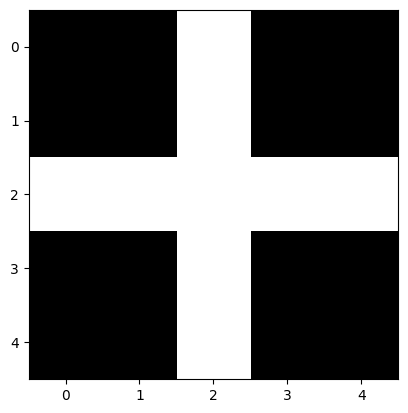

In [2]:
img = np.zeros((5, 5))
img[2, :] = 1.0
img[:, 2] = 1.0
plt.imshow(img, cmap = 'gray')


In [3]:
K = np.ones((3, 3))/9
d = K.shape[0]//2

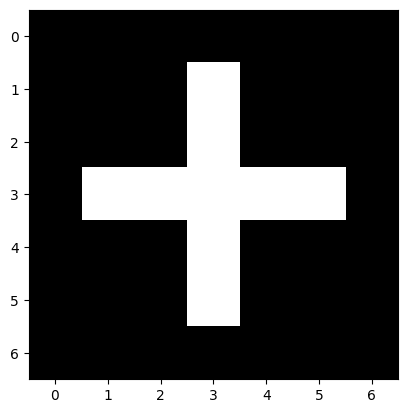

In [4]:
pad_img = np.pad(img, d)
plt.imshow(pad_img, cmap = 'gray')   

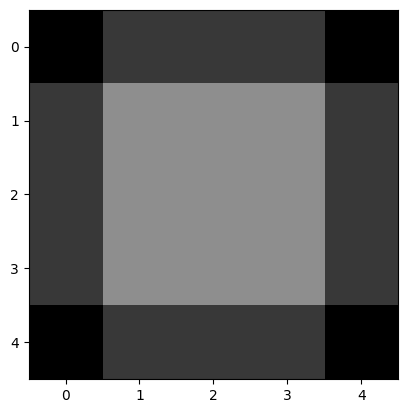

In [5]:
c_img = np.zeros(img.shape)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        part = pad_img[i : i+K.shape[0], j : j+K.shape[1]]
        c_img[i, j] = (part*K).sum()
plt.imshow(c_img, cmap = 'gray', vmin = 0, vmax = 1.0)

## Einsum

See [here](https://stackoverflow.com/questions/26089893/understanding-numpys-einsum) for good explanations.

- Repeating letters between input arrays means that values along those axes will be multiplied together. The products make up the values for the output array.
- Omitting a letter from the output means that values along that axis will be summed.
- We can return the unsummed axes in any order we like

In [6]:
A = np.random.rand(5, 4)
b = np.random.rand(4)
A@b

array([1.39993657, 1.58178377, 1.42019606, 1.25900474, 1.12947343])

In [7]:
res = np.zeros(A.shape[0])
for j in range(A.shape[1]):
    res += A[:, j]*b[j]
res

array([1.39993657, 1.58178377, 1.42019606, 1.25900474, 1.12947343])

In [8]:
np.einsum('ij, j -> i', A, b)

array([1.39993657, 1.58178377, 1.42019606, 1.25900474, 1.12947343])

Dot product

In [9]:
np.allclose(np.einsum('i, i->', b, b), np.dot(b, b))

True

Matrix Matrix product

In [10]:
np.allclose(np.einsum('ij, jk-> ik', A, A.T), A@A.T)

True

Sum of vector

In [11]:
np.allclose(np.einsum('i->', b), np.sum(b))

True

Back to convolution

In [12]:
from numpy.lib.stride_tricks import sliding_window_view
view = sliding_window_view(pad_img, K.shape)
view.shape

(5, 5, 3, 3)

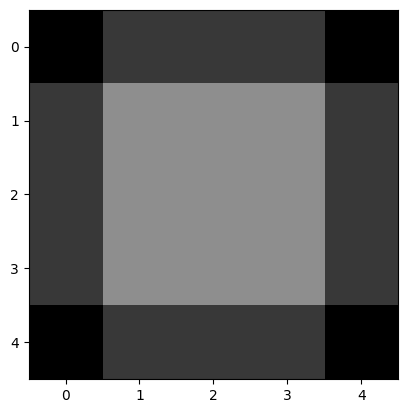

In [13]:
view = sliding_window_view(pad_img, K.shape)
c_img_einsum = np.einsum('kl,ijkl->ij', K, view)
plt.imshow(c_img_einsum, cmap = 'gray', vmin = 0, vmax = 1.0)

In [14]:
np.allclose(c_img, c_img_einsum)

True

## Timing

In [15]:
import numpy as np
from numpy.lib.stride_tricks import sliding_window_view

In [16]:
rand_img = np.random.rand(50, 50)
K = np.ones((3, 3))/9
d = K.shape[0]//2


def conv1():
    pad_img = np.pad(rand_img, d)
    c_img = np.zeros(rand_img.shape)
    for i in range(rand_img.shape[0]):
        for j in range(rand_img.shape[1]):
            part = pad_img[i : i+K.shape[0], j : j+K.shape[1]]
            c_img[i, j] = (part*K).sum()

def conv2():
    pad_img = np.pad(rand_img, d)
    view = sliding_window_view(pad_img, K.shape)
    c_img_einsum = np.einsum('kl,ijkl->ij', K, view)

In [17]:
%timeit conv1()

9.38 ms ± 62.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [18]:
%timeit conv2()

120 µs ± 1.17 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
